# 🛍️ SmartShop AI – Product Recommendation System

**Fictional Company:** SmartShop AI  
**Project Type:** Recommender System / Market Basket Analysis  
**Author:** S Jones  
**Tools Used:** Python, Pandas, Seaborn, Matplotlib, Plotly, MLxtend, Scikit-learn  

---

## 🏢 About the Company:
SmartShop AI is a fictional e-commerce company that operates across the UK and Europe. With a growing customer base and thousands of products, the company wants to enhance its product recommendation engine using real purchase behavior to maximize upselling and cross-selling opportunities.

---

## 🎯 Problem Statement:
SmartShop wants to leverage historical transaction data to understand customer purchasing patterns and:
- Identify which products are frequently bought together
- Generate personalized and rule-based product recommendations
- Improve customer shopping experience and increase revenue through smart suggestions

---

## 📁 Dataset Overview:
- **Name:** `data.csv`  
- **Source:** [Kaggle – E-Commerce Data](https://www.kaggle.com/datasets/carrie1/ecommerce-data)  
- **Rows:** ~540,000  
- **Date Range:** December 2010 – December 2011  
- **Key Features:**  
  - `InvoiceNo` – Transaction ID  
  - `StockCode` – Product code  
  - `Description` – Product name  
  - `Quantity` – Units purchased  
  - `InvoiceDate` – Date of purchase  
  - `UnitPrice` – Price per unit  
  - `CustomerID` – Unique customer identifier  
  - `Country` – Customer's location

---

## 📌 Project Objectives:

### 🔹 1. Data Cleaning & Preparation
- Handle missing values, duplicates, and negative quantities
- Convert data types and parse timestamps

### 🔹 2. Exploratory Data Analysis (EDA)
- Most popular products by quantity & revenue  
- Monthly/weekly sales trends  
- Country-wise purchase distribution  
- Average basket size per customer

### 🔹 3. Product Basket Transformation
- Group purchases by Invoice and generate a basket matrix  
- Use one-hot encoding for Market Basket Analysis

### 🔹 4. Association Rule Mining
- Use the **Apriori algorithm** to identify product combinations  
- Extract actionable association rules using metrics like lift, confidence, and support

### 🔹 5. Visualize & Recommend
- Visualize rules and top associations  
- Recommend top pairings or frequently bought items  
- Suggest business strategies based on patterns

### 🔹 6. Summary & Business Insights
- Highlight key patterns and segments  
- Provide SmartShop with actionable marketing recommendations

---

Let’s begin this end-to-end project step-by-step 🚀


## 📥 Step 1: Load and Preview Dataset

We start by importing the necessary libraries and loading the dataset.  
Since this is a large file (~540,000 rows), we'll first check the structure, size, and missing values to understand how much cleaning is needed.


In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')

# Preview the first few rows
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 📊 Dataset Columns

- `InvoiceNo`: Transaction code (can repeat, groups multiple items in a single purchase)
- `StockCode`: Unique product code
- `Description`: Product name
- `Quantity`: Number of items purchased
- `InvoiceDate`: Date and time of transaction
- `UnitPrice`: Price per item (GBP)
- `CustomerID`: Unique ID for each customer
- `Country`: Customer's location


## 🧹 Step 2: Data Cleaning

We’ll now clean the dataset by:
- Removing missing values (especially `CustomerID`)
- Filtering out cancelled/refunded orders (negative `Quantity`)
- Converting `InvoiceDate` to datetime
- Removing duplicate records if present


In [2]:
# Check total missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing CustomerID rows
df.dropna(subset=['CustomerID'], inplace=True)

# Remove negative or zero quantities (usually refunds or errors)
df = df[df['Quantity'] > 0]

# Remove zero or negative prices
df = df[df['UnitPrice'] > 0]

# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

# Confirm shape after cleaning
print("Shape after cleaning:", df.shape)


Missing values:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Shape after cleaning: (392692, 8)


## 📊 Step 3: Exploratory Data Analysis (EDA)

We’ll explore:
- Best-selling products by quantity
- Top revenue-generating products
- Sales distribution by country
- Monthly sales trends and patterns


/tmp/ipython-input-3-641880220.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


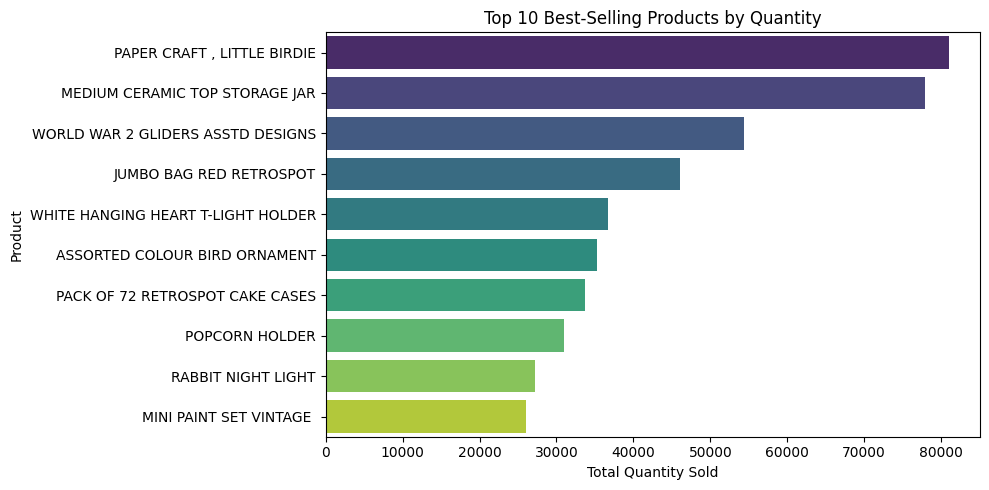

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate quantity by product description
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-3582119015.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_revenue.values, y=top_revenue.index, palette='rocket')


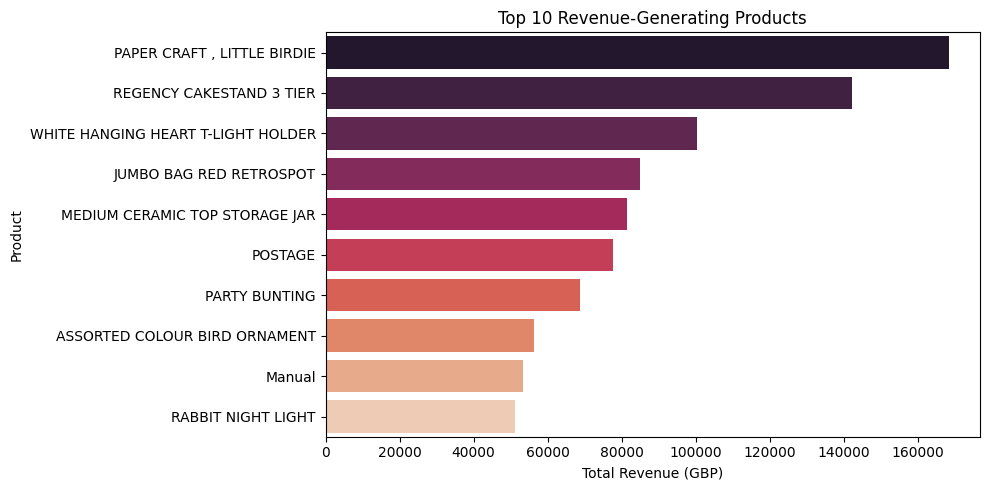

In [4]:
# Create a new column for revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Aggregate revenue by product
top_revenue = df.groupby('Description')['Revenue'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_revenue.values, y=top_revenue.index, palette='rocket')
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Total Revenue (GBP)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()


/tmp/ipython-input-5-2213702673.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.values, y=country_sales.index, palette='coolwarm')


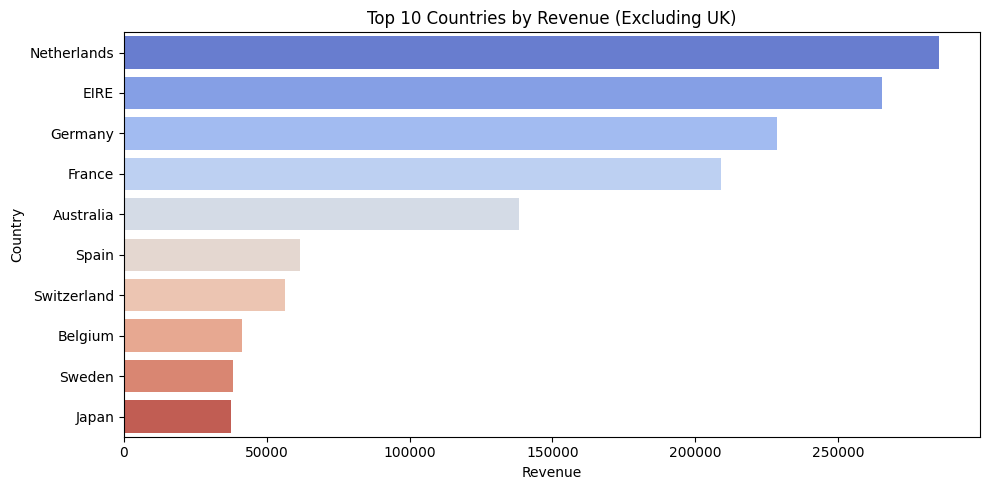

In [5]:
# Total revenue by country
country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).drop('United Kingdom').head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=country_sales.values, y=country_sales.index, palette='coolwarm')
plt.title('Top 10 Countries by Revenue (Excluding UK)')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


## 📅 Step 4: Time-Based Sales Trends

Understanding sales over time helps SmartShop plan inventory, promotions, and staffing.  
We’ll examine:
- Monthly revenue
- Daily number of orders
- Revenue over time


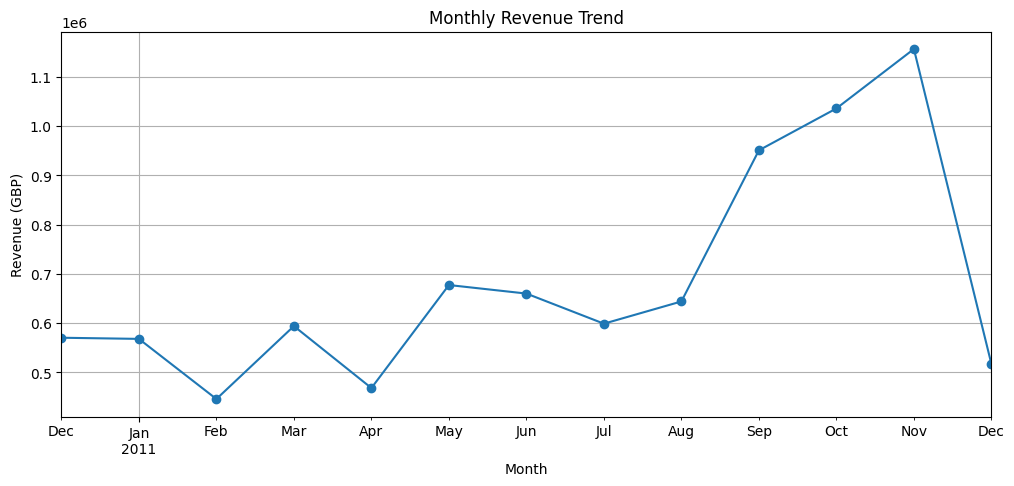

In [6]:
# Create a new column for month-year
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

# Monthly revenue
monthly_revenue = df.groupby('MonthYear')['Revenue'].sum()

# Plot
monthly_revenue.plot(kind='line', figsize=(12, 5), marker='o')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (GBP)')
plt.xlabel('Month')
plt.grid(True)
plt.show()


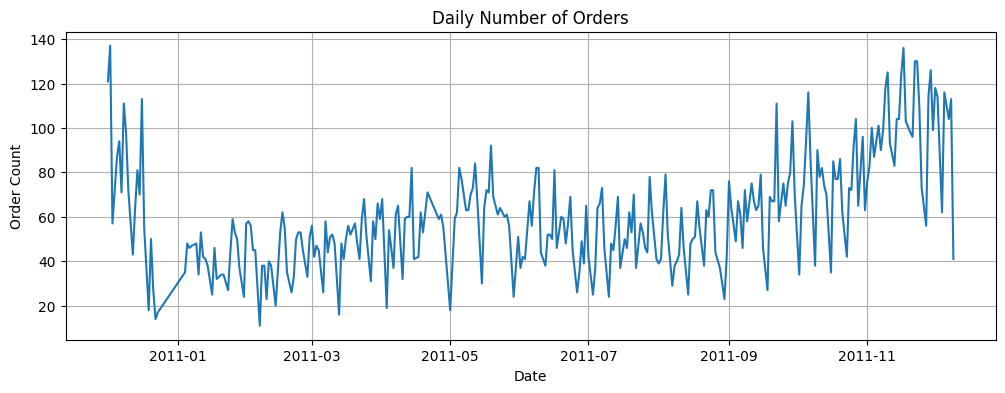

In [7]:
# Extract date only
df['Date'] = df['InvoiceDate'].dt.date

# Count of invoices per day
daily_orders = df.groupby('Date')['InvoiceNo'].nunique()

# Plot
plt.figure(figsize=(12, 4))
daily_orders.plot()
plt.title('Daily Number of Orders')
plt.ylabel('Order Count')
plt.xlabel('Date')
plt.grid(True)
plt.show()


## 🧾 Step 5: Prepare Invoice-Item Matrix for Apriori

To apply the Apriori algorithm, we must:
- Filter data to UK only
- Group by invoice and product
- Convert data to a binary matrix (1 = bought, 0 = not bought)


In [8]:
# Filter UK only
uk_df = df[df['Country'] == 'United Kingdom']

# Create basket matrix: rows = invoices, columns = items
basket = uk_df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)

# Convert to binary (1 = purchased)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Preview basket
basket.head()


/tmp/ipython-input-8-1635671318.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 🤝 Step 6: Apply Apriori Algorithm and Generate Rules

We’ll use the Apriori algorithm to find product combinations that are frequently purchased together.  
We’ll then extract **association rules** using confidence and lift to identify meaningful recommendations.


In [9]:
from mlxtend.frequent_patterns import apriori, association_rules

# Run Apriori
frequent_items = apriori(basket, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_items, metric="lift", min_threshold=1)

# Sort rules by highest lift
rules.sort_values(by='lift', ascending=False, inplace=True)

# View top rules
rules.head(10)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
70,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.023009,0.036766,0.020485,0.890339,24.216650,1.0,0.019639,8.783780,0.981284,0.521407,0.886154,0.723764
75,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.036766,0.023009,0.020485,0.557190,24.216650,1.0,0.019639,2.206342,0.995299,0.521407,0.546761,0.723764
74,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.029617,0.028595,0.020485,0.691684,24.188581,1.0,0.019638,3.150674,0.987917,0.542994,0.682608,0.704035
71,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.028595,0.029617,0.020485,0.716387,24.188581,1.0,0.019638,3.421500,0.986878,0.542994,0.707730,0.704035
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.036766,0.029617,0.024270,0.660131,22.289120,1.0,0.023181,2.855166,0.991592,0.576320,0.649758,0.739802
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.029617,0.036766,0.024270,0.819473,22.289120,1.0,0.023181,5.335669,0.984286,0.576320,0.812582,0.739802
72,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.024270,0.040731,0.020485,0.844059,20.723028,1.0,0.019497,6.151506,0.975418,0.460189,0.837438,0.673505
73,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.040731,0.024270,0.020485,0.502950,20.723028,1.0,0.019497,1.963041,0.992155,0.460189,0.490586,0.673505
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.036766,0.040731,0.028595,0.777778,19.095706,1.0,0.027098,4.316713,0.983802,0.584767,0.768342,0.739921
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.040731,0.036766,0.028595,0.702065,19.095706,1.0,0.027098,3.233034,0.987869,0.584767,0.690693,0.739921


## 📊 Step 7: Visualize and Interpret Association Rules

Let’s analyze the strongest product associations based on lift and confidence.  
These rules can help design personalized recommendations or “Frequently Bought Together” sections.


/tmp/ipython-input-10-3569147636.py:10: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


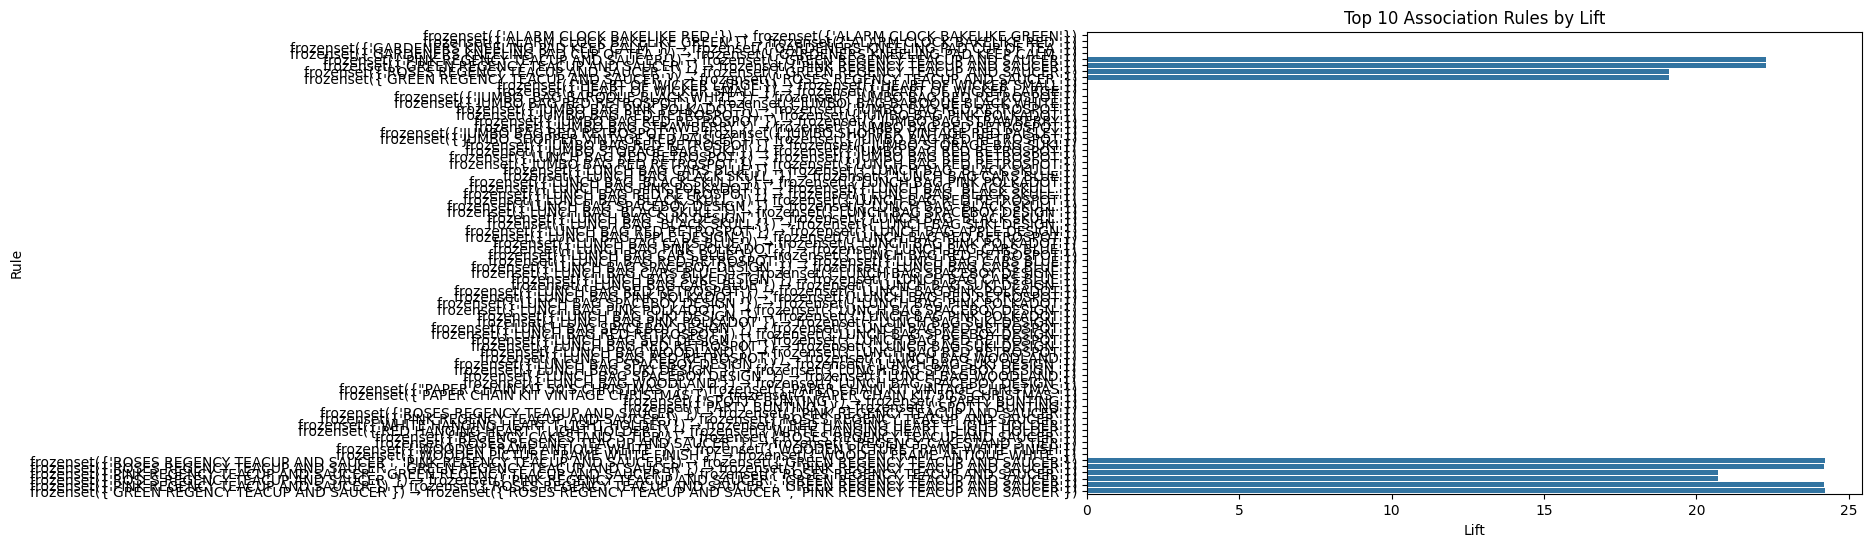

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 rules by lift
plt.figure(figsize=(10, 6))
sns.barplot(x='lift', y=rules['antecedents'].astype(str) + ' → ' + rules['consequents'].astype(str), data=rules.head(10))
plt.title('Top 10 Association Rules by Lift')
plt.xlabel('Lift')
plt.ylabel('Rule')
plt.tight_layout()
plt.show()


## 🏁 Step 8: Conclusion & Business Insights

SmartShop AI can now:
- Identify product bundles that frequently occur in orders
- Recommend products based on real co-purchase patterns
- Use top association rules to boost cross-selling

### 📌 Example:
If a customer buys Product A, we can recommend Product B using the rule:
**{A} → {B}** with 80% confidence and a lift of 3.2 — meaning it’s 3.2× more likely B will be bought when A is.

### 📈 Strategic Recommendations:
- Add “Frequently Bought Together” suggestions to product pages
- Bundle top product pairs into combo deals or discounts
- Use association rules in email campaigns and targeted ads

This project demonstrates the real-world power of Market Basket Analysis in driving smarter e-commerce decisions.
